# Homework 2

From Allaire's book.
## Ex 2.25

Plot the image of the unit circle of $\mathbb R^2$ by the matrix $$ A = \begin{pmatrix} −1.25 & 0.75\\0.75 & −1.25 \end{pmatrix} $$ to reproduce previous figure. Use the Matlab function `svd`.

In [1]:
A = [-1.25 0.75; 0.75 -1.25];
[U,S,V]= svd(A);
v1 = V(:,1);
v2 = V(:,2);
u1 = zeros(2,1);
u2 = zeros(2,1);

theta = linspace(0,2*pi);
x = [cos(theta); sin(theta)];
y1 = V*x;
y2 = S*y1;
y3 = U*y2;

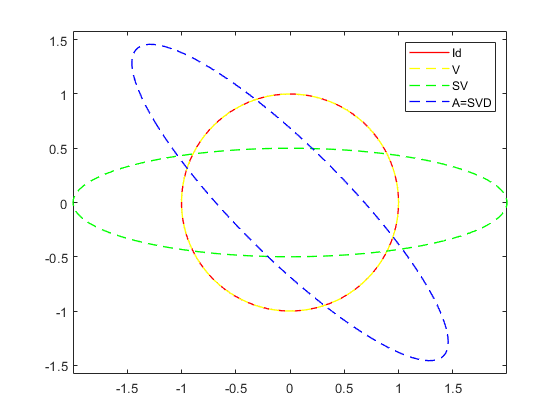

In [55]:
plot(x(1,:), x(2,:),'r','LineWidth',1.0)
hold on
plot(y1(1,:), y1(2,:),'y--','LineWidth',1.0)
plot(y2(1,:), y2(2,:),'g--','LineWidth',1.0)
plot(y3(1,:), y3(2,:),'b--','LineWidth',1.0)
hold off
axis equal
legend('Id','V','SV','A=SVD')

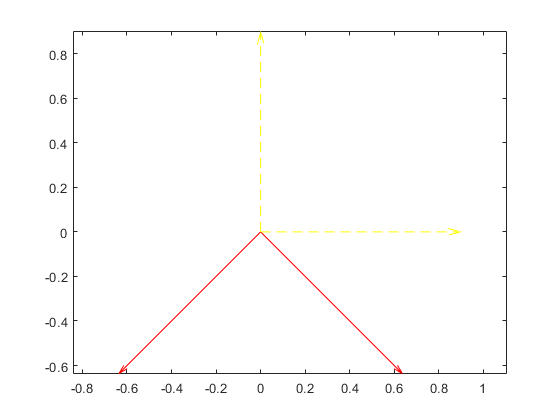

In [57]:
quiver(0,0,v1(1),v1(2),'r')
hold on
quiver(0,0,v2(1),v2(2),'r')
u1 = V*v1;
u2 = V*v2;
quiver(0,0,u1(1),u1(2),'y--')
quiver(0,0,u2(1),u2(2),'y--')
axis equal
hold off

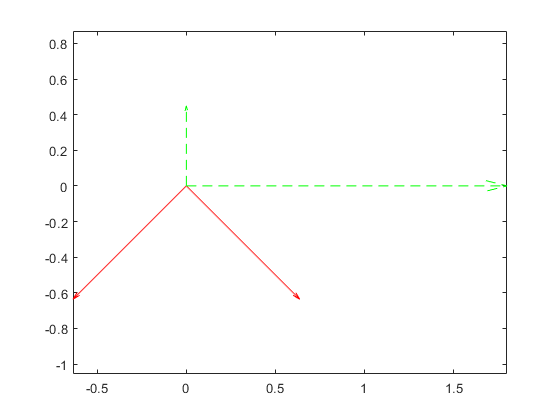

In [58]:
quiver(0,0,v1(1),v1(2),'r')
hold on
quiver(0,0,v2(1),v2(2),'r')
u1 = S*V*v1;
u2 = S*V*v2;
quiver(0,0,u1(1),u1(2),'g--')
quiver(0,0,u2(1),u2(2),'g--')
axis equal
hold off

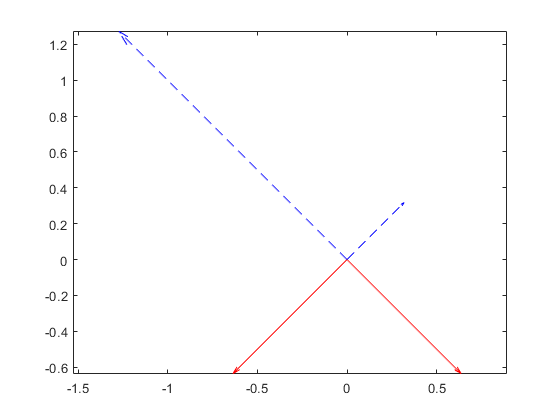

In [59]:
quiver(0,0,v1(1),v1(2),'r')
hold on
quiver(0,0,v2(1),v2(2),'r')
u1 = A*v1;
u2 = A*v2;
quiver(0,0,u1(1),u1(2),'b--')
quiver(0,0,u2(1),u2(2),'b--')
axis equal
hold off

The pictures above exemplify how the SVD decomposition $A = U\Sigma V^*$ works. Firstly, we change coordinates employing the orthogonal matrix $V^*$. Secondly, we do a dilatation using $\Sigma$. Finally, we do a change of coordinates through $U$. Notice that a reasonable basis choice allows us to preserve orthogonality when applying the different matrices.

## Ex 2.26
For different choices of $m$ and $n$, compare the singular values of a matrix `A=rand(m,n)` and the eigenvalues of the block matrix $$B = \begin{pmatrix} 0 & A\\ A^* & 0 \end{pmatrix}.$$ Justify.

In [46]:
disp('* * *')
for k=2:5
    n = ceil(k*rand());
    m = ceil(k*rand());
    
    A = rand(m,n);
    B = [zeros(m,m) A; A' zeros(n,n)];
    disp(['Current size of A:  ',num2str(m),',',num2str(n)])
    disp('Singular values of A')
    disp(svd(A))
    disp('Eigenvalues of B')
    disp(eig(B))
    disp('* * *')
end

* * *
Current size of A:  1,2
Singular values of A
    1.0401

Eigenvalues of B
   -1.0401
    0.0000
    1.0401

* * *
Current size of A:  3,2
Singular values of A
    1.1405
    0.0250

Eigenvalues of B
   -1.1405
   -0.0250
    0.0000
    0.0250
    1.1405

* * *
Current size of A:  3,1
Singular values of A
    1.0850

Eigenvalues of B
   -1.0850
         0
         0
    1.0850

* * *
Current size of A:  5,5
Singular values of A
    2.9421
    0.8522
    0.4866
    0.2370
    0.0302

Eigenvalues of B
   -2.9421
   -0.8522
   -0.4866
   -0.2370
   -0.0302
    0.0302
    0.2370
    0.4866
    0.8522
    2.9421

* * *



We say that $(v,\sigma,u)$ is a *singular triple* of $A$ if, and only if, $(v,\sigma^2)$ is a spectral pair of $A^* A$ and $Av = \sigma u$, with $\sigma > 0$.

It is easy to check that a spectral pair of $B$ allows us to construct a singular triple of $A$. Indeed, let $(x,\lambda)$ a spectral pair for $B$. Then, if we put $ x^* = [u^* | v^*]$, we have
$$ Bx = \begin{pmatrix} 0 & A\\ A^* & 0 \end{pmatrix} \begin{bmatrix} u\\ v \end{bmatrix} = \begin{bmatrix} Av\\ A^*u \end{bmatrix} = \begin{bmatrix} \lambda u\\ \lambda v \end{bmatrix} = \lambda x.$$
Thus $ Av = \lambda u$ and $A^* u = \lambda v$. This implies $A^*Av = \lambda A^*u = \lambda^2 v,$ so necessarily $|\lambda|$ is a singular value of $A$, and $(v,|\lambda|,\mathrm{sgn}(\lambda)u)$ is a singular triple.

Conversely, if $(v,\sigma,u)$ is a singular triple, then $ x^*_1 = [u^* | v^*] $ and $\lambda = \sigma$ give us a spectral pair of $B$. This is just the above computation. *Where is the other spectral pair?* Notice that $Av = \sigma u = (-\sigma) (-u)$ and $A^*(-u) = -\sigma v$, so $ x^*_2 = [-u^* | v^*] $ and $\lambda = -\sigma$ give us the missing spectral pair of $B$, as $x_1$ and $x_2$ cannot be linearly dependent vectors.

## Ex 2.27
Compute the pseudoinverse $A^\dag$ (function `pinv`) of the matrix $$A =\begin{pmatrix} 1 & −1 & 4 \\ 2 & −2 & 0 \\ 3 & −3 & 5 \\ −1 & -1 & 0\end{pmatrix}.$$ Compute $A^\dag A$, $AA^\dag$, $AA^\dag A$, and $A^\dag AA^\dag$. What do you observe? Justify.

In [2]:
A = [1 -1 4; 2 -2 0; 3 -3 5; -1 -1 0];
Adag = pinv(A)

Adag*A
A*Adag
A*Adag*A
Adag*A*Adag


Adag =

   -0.0822    0.1925    0.0657   -0.5000
    0.0822   -0.1925   -0.0657   -0.5000
    0.1737   -0.1784    0.0610   -0.0000


ans =

    1.0000    0.0000   -0.0000
   -0.0000    1.0000   -0.0000
    0.0000   -0.0000    1.0000


ans =

    0.5305   -0.3286    0.3756   -0.0000
   -0.3286    0.7700    0.2629         0
    0.3756    0.2629    0.6995   -0.0000
    0.0000    0.0000    0.0000    1.0000


ans =

    1.0000   -1.0000    4.0000
    2.0000   -2.0000    0.0000
    3.0000   -3.0000    5.0000
   -1.0000   -1.0000    0.0000


ans =

   -0.0822    0.1925    0.0657   -0.5000
    0.0822   -0.1925   -0.0657   -0.5000
    0.1737   -0.1784    0.0610   -0.0000




Set $A = U\Sigma V^* $ in its SVD decomposition, and consider $A^\dag = V\hat\Sigma U^*$ its pseudoinverse, where $ \hat \Sigma $ is the transpose of the non-zero multiplicative inverses of the elements of $\Sigma$. Then:

1. $A^\dag A = (V\hat\Sigma U^*)(U\Sigma V^*)= V \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{m\times m} V^*$, and notice that the rank of the matrix equals the number of columns $\mathrm{rank}(A) = 3 = m $, so $$\begin{bmatrix} \mathrm{Id}_{r\times r}& 0\\ 0 & 0 \end{bmatrix}_{m\times m} = \mathrm{Id}_{3\times 3}$$ in this case.

2. $A A^\dag = (U\Sigma V^*)(V\hat\Sigma U^*)= U \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{n\times n} U^*$. As $n= 4 > 3 = \mathrm{rank}(A)$, we cannot neglet the contribution of $\Sigma\hat\Sigma = \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{n\times n}.$

3. $A^\dag A A^\dag= (V\hat\Sigma U^*)(U\Sigma V^*)(V\hat\Sigma U^*) = V\begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{m\times m} \hat\Sigma U^* = V\hat\Sigma U^* = A^\dag$.

4. $A A^\dag A = (U\Sigma V^*)(V\hat\Sigma U^*)(U\Sigma V^*) = U \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{n\times n}  \Sigma V^* = U\Sigma V^*$.

## Ex 2.28
Fix $n = 100$. For different values of $r ≤ n$, compare the rank of `A=MatRank(n,n,r)` and the trace of $AA^\dag$. Justify.

In [86]:
%%file MatRank.m
function A = MatRank(n,m,r)

if (r>min(n,m))
    A = 0;
    disp('Error')
else
    sigma = 0;
    while (det(sigma)==0)
        sigma = rand(r,r);
    end
    Sigma = [sigma zeros(r,m-r); zeros(n-r,r) zeros(n-r,m-r)];
    
    U = 0;
    V = 0;
    while ((det(U)==0)||(det(V)==0))
        U = GramSchmidt(rand(n,n));
        V = GramSchmidt(rand(m,m));
    end
    A = U*Sigma*V;
end    

Created file 'D:\GitHub\NLA-IMA\hw2\MatRank.m'.


In [77]:
%%file GramSchmidt.m
function Q = GramSchmidt(A)

n = size(A,2);
Q = zeros(size(A));

for k = 1:n
    Q(:,k) = zeros(size(A,1),1);
    for j = 1:(k-1)
        Q(:,k) = Q(:,k) + dot(A(:,k),Q(:,j))*Q(:,j);
    end
    Q(:,k) = A(:,k) - Q(:,k);
    if (norm(Q(:,k))~=0)
        Q(:,k) = Q(:,k)./norm(Q(:,k));
    end
end

Created file 'D:\GitHub\NLA-IMA\hw2\GramSchmidt.m'.


In [88]:
n = 100;

disp('* * *')
for r = 5:5:(n-1)
    A = MatRank(n,n,r);
    disp(['Rank of A:  ',num2str(r)])
    disp(['Trace of A pinv A: ',num2str(trace(A*pinv(A)))])
    disp('* * *')
end

* * *
Rank of A:  5
Trace of A pinv A: 5
* * *
Rank of A:  10
Trace of A pinv A: 10
* * *
Rank of A:  15
Trace of A pinv A: 15
* * *
Rank of A:  20
Trace of A pinv A: 20
* * *
Rank of A:  25
Trace of A pinv A: 25
* * *
Rank of A:  30
Trace of A pinv A: 30
* * *
Rank of A:  35
Trace of A pinv A: 35
* * *
Rank of A:  40
Trace of A pinv A: 40
* * *
Rank of A:  45
Trace of A pinv A: 45
* * *
Rank of A:  50
Trace of A pinv A: 50
* * *
Rank of A:  55
Trace of A pinv A: 55
* * *
Rank of A:  60
Trace of A pinv A: 60
* * *
Rank of A:  65
Trace of A pinv A: 65
* * *
Rank of A:  70
Trace of A pinv A: 70
* * *
Rank of A:  75
Trace of A pinv A: 75
* * *
Rank of A:  80
Trace of A pinv A: 80
* * *
Rank of A:  85
Trace of A pinv A: 85
* * *
Rank of A:  90
Trace of A pinv A: 90
* * *
Rank of A:  95
Trace of A pinv A: 95
* * *



Notice that given $A = U\Sigma V^* $ in its SVD decomposition, we have $A^\dag = V\hat\Sigma U^*$. This implies $AA^\dag = U\Sigma \hat \Sigma U^*,$ as $V$ is an orthogonal matrix. The cyclic property of the trace easily implies that $$\mathrm{trace}(AA^\dag) = \mathrm{trace}(U\Sigma \hat \Sigma U^*) = \mathrm{trace}(\Sigma \hat \Sigma) =r,$$ as $\Sigma \hat \Sigma$ is a block matrix whose principal block is an identity matrix of rank $r$, and the other entries are null.

## Ex 2.29
The goal of this exercise is to investigate another definition of the pseudoinverse matrix. Fix $m = 10$, $n = 7$. Let $A$ be a matrix defined by `A=MatRank(m,n,5)`. We denote by $P$ the orthogonal projection onto $(\ker A)^\perp$, and by $Q$ the orthogonal projection onto $\mathrm{im}\ A$.

In [2]:
m = 10;
n = 7;
A = MatRank(m,n,5);

1. Compute a basis of $(\ker A)^\perp$, then the matrix P.

First notice that $(\ker A)^\perp = \overline{ \mathrm{im}\ A^*}.$ So:

In [5]:
kerAp = orth(A');
P = kerAp*kerAp';

2. Compute a basis of $\mathrm{im } \ A$, then the matrix $Q$.

In [7]:
imA = orth(A);
Q = imA*imA';

3. Compare on the one hand $A^\dag A$ with $P$, and on the other hand, $AA^\dag$ with $Q$. What do you notice? Justify your answer.

In [8]:
disp('* * *')
disp('pinv A  A')
pinv(A)*A
disp('Orthogonal proyection P onto ker A perp')
P

* * *
pinv A  A

ans =

    0.6161   -0.0860    0.1881   -0.2727    0.3093   -0.1520    0.0246
   -0.0860    0.7815   -0.0047    0.2469    0.2724   -0.1357   -0.0989
    0.1881   -0.0047    0.8968    0.2060   -0.1038    0.0506   -0.0366
   -0.2727    0.2469    0.2060    0.3301   -0.0942    0.0491    0.1789
    0.3093    0.2724   -0.1038   -0.0942    0.5439    0.2260    0.0866
   -0.1520   -0.1357    0.0506    0.0491    0.2260    0.8880   -0.0435
    0.0246   -0.0989   -0.0366    0.1789    0.0866   -0.0435    0.9437

Orthogonal proyection P onto ker A perp

P =

    0.6161   -0.0860    0.1881   -0.2727    0.3093   -0.1520    0.0246
   -0.0860    0.7815   -0.0047    0.2469    0.2724   -0.1357   -0.0989
    0.1881   -0.0047    0.8968    0.2060   -0.1038    0.0506   -0.0366
   -0.2727    0.2469    0.2060    0.3301   -0.0942    0.0491    0.1789
    0.3093    0.2724   -0.1038   -0.0942    0.5439    0.2260    0.0866
   -0.1520   -0.1357    0.0506    0.0491    0.2260    0.8880   -0.0435
    0.

In [9]:
disp('* * *')
disp('A pinv A')
A*pinv(A)
disp('Orthogonal proyection Q onto Im A')
Q

* * *
A pinv A

ans =

    0.6567   -0.0081   -0.0594    0.0796   -0.1077    0.2536   -0.0333    0.3358   -0.1288   -0.0957
   -0.0081    0.4543    0.1704    0.2617    0.0169    0.2820   -0.1029   -0.1610    0.1196    0.1404
   -0.0594    0.1704    0.2719    0.2083    0.2939    0.0500    0.1346   -0.0428   -0.0944   -0.0652
    0.0796    0.2617    0.2083    0.4998    0.0009    0.0027    0.0755    0.0152    0.2172   -0.2805
   -0.1077    0.0169    0.2939    0.0009    0.5213    0.0111    0.2848    0.0688   -0.2339    0.1030
    0.2536    0.2820    0.0500    0.0027    0.0111    0.3976   -0.1578   -0.0321   -0.1442    0.2153
   -0.0333   -0.1029    0.1346    0.0755    0.2848   -0.1578    0.3429    0.2666    0.1031    0.0458
    0.3358   -0.1610   -0.0428    0.0152    0.0688   -0.0321    0.2666    0.4868    0.1493    0.0998
   -0.1288    0.1196   -0.0944    0.2172   -0.2339   -0.1442    0.1031    0.1493    0.6645    0.1659
   -0.0957    0.1404   -0.0652   -0.2805    0.1030    0.2153    0.04

Recall that, if $A=U\Sigma V^*$, then $$A^\dag A = V \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{m\times m} V^* \ \ \text{ and } \ \ A A^\dag = U \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{n\times n} U^*.$$ 

The near-identity blocks are idempotent and symetric. If we define $$ \hat V = V \begin{bmatrix} \mathrm{Id}_{r\times r} & 0\\ 0 & 0 \end{bmatrix}_{m\times m}\ \  \text{ and  } \ \ \hat U = U \begin{bmatrix} \mathrm{Id}_{r\times r}& 0\\ 0 & 0 \end{bmatrix}_{n\times n},$$ then we find $A^\dag A = \hat V \hat V^*$ and $A^\dag A = \hat U \hat U^*$.

Observe that $\hat V$ has the first $r:=\mathrm{rank}(A)$ column vectors of $V$ and $\hat U$ has the first $r$ column vectors of $U$. So if write consider the first $r$ column vectors of $V$, $v_i,\ i=1,\dots,r$, and of $U$, $u_i,\ i=1,\dots,r$, and the reduced SVD decomposition of $A$, given by $$ A = \sum_{i=1}^r \sigma_i u_iv_i^*,$$ its oblivious to see that $ x\in \ker A $ if and only if $ x \bot v_i,\ i=1,\dots,r$, so $v_i,\ i=1,\dots,r$ span $(\ker A)^\perp$. This implies that $\hat V \hat V^*$ is an orthogonal proyector onto $(\ker A)^\perp$.

Thus $A^\dag A =\hat V \hat V^* = P$. In a similar fashion, $A A^\dag =\hat U \hat U^* = Q$.

4. Let $y \in \mathbb{C}^m$ and define $x_1 := Px$, where $x \in \mathbb{C}^n$ is such that $Ax = Qy$. Prove (without using `MATLAB`) that there exists a unique such $x_1$. Consider the linear map $\phi : \mathbb{C}^m → \mathbb{C}^n$ by $\phi(y) = x_1$. Show (without using `MATLAB`) that the matrix corresponding to this map (in the canonical basis) is $A^\dag$.

Let $ y\in \mathbb{C}^m$. As $Qy\in \mathrm{im}\ A,$ there exist $x\in\mathbb{C}^n$ such that $Ax=Qy.$ Then, we can such $x_1$. Now, suppose that exist $x_2=Px'$, with $Ax'=Qy$. This implies $A(x-x') = Qy - Qy = 0,$ and $x-x'\in \ker A$. So $$ x_1 - x_2 = Px - Px' = P(x-x') = 0,$$ and $x_1 = x_2$.

Now set $e_i,\ i=1,\dots, n$ for the canonical basis of $\mathbb{C}^n$. Keep in mind that $A^\dag A = P$ and $A A^\dag = Q$. Then if we set $\phi(e_1) = x_1$, then $x_1$ is given by $x_1 = Px = A^\dag A x$ and $Ax = Qe_i = A A^\dag e_i $ So $$ A^\dag e_i = A^\dag A A^\dag e_i = A^\dag A x = x_1,$$ i.e. $\phi(e_i)=A^\dag e_i,$ for each $i=1,\dots,n$, and $A^\dag$ is the matrix assosiated to $\phi$.